In [1]:
import math
import numpy as np

# Elliptical, parabolic, and hyperbolic orbits using the Euler method

In the simple_two_body.ipynb notebook I implemented circular orbits with arbitary starting positions and confirmed that the truncation error converged linearly with timestep for the Euler method.  

In this notebook I plan to implement hyperbolic, elliptical, and parabolic orbits using the Euler method. Parabolic orbits are marginally bound, hyperbolic orbits are unbound, and elliptical orbits are bound but oblong. All orbits should have the center of mass at one focus for both stars orbit and be symmetric between the two stars. 

Elliptical orbits should be elongated away from the other star. 

Hyperbolic and parabolic orbits should open away from the other star. 

All orbits should conserve energy and angular momentum. Later this could be enforced. I will probably not do that in this notebook. 

It would be meaningless to evaluate the L0 error for a hyperbolic or parabolic orbit since there is no cycle and the L0 error is found after one or more cycles when the system returns to its starting point. However, it would be possible to evaluate it for the elliptical orbit system, and I intend to check that the convergence of the L0 error with dt is linear as it should be for the Euler method. 

Because the convergence can be tested for ellipses only and because ellipses are closed so make it clear if they are not working correctly graphically, I will begin with ellipses then proceed to parabolas and hyperbolas. 

# Conic sections

Circles, ellipses, parabolas, and hyperbolas are called conic sections because they can all be obtained by taking slices of an infinite cone. 

Conic sections are related to each other through a parameter called eccentricity. Circles have an eccentricity of 0. Ellipses have an eccentricity of 0<e<1. Parabolas have an eccentricity of e=1. Hyperbolas have an eccentricity of e>1. 

Circles are described by the equation x^2+y^2=r^2 where r is the radius. They can also be described parametrically using sine and cosine. That is done below. 

In [2]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
radius=10
t=2*math.pi*0.01*np.arange(103)
centerx=3
centery=5
p = figure(title="Circle", plot_width=400, plot_height=400)
p.line(centerx+np.cos(t),centery+np.sin(t),line_width=3,line_color="blue",legend="Circle")
p.circle(centerx,centery,line_width=15,line_color="green",legend="Center")
p.legend.location="bottom_right"
show(p)

Loading BokehJS ...

Ellipses are shaped like ovals. They have two locations called focuses that determine their shapes. If a string were connected to both focuses, which are inside the ellipse, you could slide a pencil along the string and draw the ellipse keeping the string taut. The two focuses and the ellipse form a triangle with hypoteneuses of fixed length. 

Half the shorter of the two widths of the ellipse is called the semimajor axis, a. It's like a radius for ellipses. The lenght of the longer width is (1+e)*a. The focus is offset from the center by f=e*sqrt(1-e^2)*a. 

Ellipses can also be drawn at angles to the axis. An ellipse aligned with the x and y axis is shown below. 

The nonparametric equation for an ellipse is x^2/a^2+y^2/b^2=1
Below the ellipse is described parametrically. 

In [3]:
def getfocus(a,ecc):
    b=a*(1+ecc)
    #return np.sqrt(b**2-a**2)
    return ecc*np.sqrt(1-ecc**2)*b

In [4]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
radius=10
t=2*math.pi*0.01*np.arange(103)
a=10
ecc=.5
b=a*(1+ecc)
centerx=0
centery=0
focusx=centerx+getfocus(a,ecc)
focusy=centery+0.0
p = figure(title="Ellipse", plot_width=400, plot_height=400, x_range=[-15,15], y_range=[-15,15])
p.line(centerx+b*np.cos(t),centery+a*np.sin(t),line_width=3,line_color="blue",legend="Circle")
p.circle(focusx,focusy,line_width=15,line_color="green",legend="Focus 1")
p.circle(centerx-getfocus(a,ecc),focusy, line_width=15, line_color="red", legend="Focus 2")
p.legend.location="bottom_right"
show(p)

Loading BokehJS ...

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def NewtonianForce(mass1,mass2, r):
    return (6.67408*10**-11)*mass1*mass2/r/r;

In [6]:
def euler(h,t, x,y,z,f,debugprint):
    xstep = (f(t, x, y,z)+f(t+h,x+h,y,z))/2*h
    xnew=x+xstep
    if(debugprint):
        print(h,t,x,xstep,xnew)
    return t+h,xnew

In [7]:
import math
def InitialDataEqualMassConic(radius,ecc,angle,initmass):
    orbitalangle=angle
    print("angle",angle)
    phi=np.array([math.pi+orbitalangle,orbitalangle])
    orbitalradius=radius*np.ones(2) #semimajor axis
    eccentricity=ecc
    print(eccentricity)
    mass=np.ones(2)
    masses=initmass*mass #*masssun (natural units)
    return phi,orbitalangle,orbitalradius,eccentricity, masses
    

In [8]:
import random,numpy as np
rad0=100
ecc0=0.5
angle0=0.0
mass0=1.0
initdateqellipse=InitialDataEqualMassConic(rad0,ecc0,angle0,mass0)
print(initdateqellipse)

angle 0.0
0.5
(array([3.14159265, 0.        ]), 0.0, array([100., 100.]), 0.5, array([1., 1.]))


In [28]:
def getxyuveqconicredmass(initdat):
    phi,orbitangle,orbitalradius,eccentricity, masses=initdat
    print("initdat", orbitalradius, phi, np.cos(phi), np.sin(phi))
    metersperAU=1
    Gconstant=1
    #fix x0 y0 at one star, disregard initial data, use orbital radius as separation between stars
    #this is consistant with choice in previous part
    cosphi=np.cos(phi)
    sinphi=np.sin(phi)
    coordsep=orbitalradius #/2.
    print("coordsep",coordsep)
    #x0=orbitalradius/2.*np.cos(phi)*metersperAU
    #y0=orbitalradius/2.*np.sin(phi)*metersperAU
    count=0
    for phi0 in phi:
        if phi0==0:
            print("zero")
            #x0[count]=orbitalradius[count]/2.
            #y0[count]=0
            cosphi[count]=1.0
            sinphi[count]=0.0
        if phi0==math.pi:
            cosphi[count]=-1.0
            sinphi[count]=0.0
            print("pi")
            #x0[count]=-orbitalradius[count]/2.
            #y0[count]=0
        if phi0==math.pi/2.:
            cosphi[count]=0.0
            sinphi[count]=1.0
            #x0[count]=0
            #y0[count]=orbitalradius[count]/2.
        if phi0==3*math.pi/2.:
            cosphi[count]=0.0
            sinphi[count]=-1.0
            #x0[count]=0
            #y0[count]=-orbitalradius[count]/2.
        count+=1
    x0=coordsep*cosphi
    y0=coordsep*sinphi
    #x0[1]=0.0
    #y0[1]=0.0
    z0=np.zeros(2)
    print(x0)
    print(y0)
    v=np.zeros(2)
    a=np.zeros(2)
    ax0=0.
    ay0=0.
    az0=0.
    vx0=0.
    vy0=0.
    vz0=0.
    print(eccentricity)
    reducedmass=np.zeros(2)
    reducedmass[0]=masses[0]+masses[1]
    reducedmass[1]=masses[0]*masses[1]/reducedmass[0]
    if eccentricity<1 and eccentricity>0:
        #elliptical
        orbitalr=orbitalradius[0]/2. #reduced mass
        focusdisp=getfocus(orbitalr,eccentricity) #displacement of the center due to the focus being at the center
        E=-Gconstant*reducedmass[0]*reducedmass[1]/(2*orbitalr) #orbitalradius is correct here r1+r2.
        #This factor of half is due to the virial (VEE-REE-AHL) theorem, a stellar dynamics theorem governing the 
        #equipartion of degrees of freedom of energy in a system. Another way of writing it is T=-1/2*V. 2T-V=0
        coordsep=orbitalr*(1.+eccentricity) #starts at apastron
        starsep=coordsep #reduced mass, M is at center
        Eapastron=-Gconstant*reducedmass[0]*reducedmass[1]/(2*starsep) #virial theorem again 
        Fapastron=Eapastron/(starsep)
        print("E,F",E,Eapastron,2*Eapastron, 2*orbitalr,starsep)
        print("pos",coordsep, focusdisp, 2*coordsep-focusdisp)
        x0=(2*coordsep-focusdisp)*cosphi
        y0=(2*coordsep-focusdisp)*sinphi
        x0[0]=0.0
        y0[0]=0.0
        v=np.zeros(2)
        v[0]=0.0
        vwikipedia=np.sqrt(reducedmass[0]*(2./starsep-1./orbitalr))
        v[1]=np.sqrt(2.*(E-2.*Eapastron)/reducedmass[1]) #1/2*mv^2-GMm/starsep=E. Solve for v. Eapastron=-GMm/2starsep
        print("vtest",vwikipedia,v[1])
        ux0=-v*sinphi
        uy0=v*cosphi #initial data in y only 
        uz0=np.zeros(2)
    
        a=np.zeros(2)
        a[0]=0.0
        a[1]=Fapastron/reducedmass[1]
    
        ax0=-a*cosphi
        ay0=-a*sinphi
        az0=np.zeros(2)
    elif eccentricity[0]==0.0: #circular
        #start at perihelion for both (eliptical, doesn't generalize to three body)
        #actually start with circular orbit
        ux0=np.zeros(2) #*149597870700
        #centrepital force balances gravitational force
        metersperAU=1 #natural units
        #G=1
        Gconstant=1
        #Fcentripital=mass1*v**2/rphys
        #centF=accel
        #Faccel=G*m1*m2/r^2
        r0=2.*orbitalradius #Mystery factor of 2
        print("r0", r0)
        v=np.zeros(2)
        for i in np.arange(2):
            v[i]=np.sqrt(Gconstant*masses[(i+1)%2]/np.abs(r0[i]))
        print(v)
        #r0=orbitalradius #np.sqrt(x0**2+y0**2)
        ux0=-v*sinphi
        uy0=v*cosphi #initial data in y only 
        uz0=np.zeros(2)
    
        a=np.zeros(2)
        for i in np.arange(2):
            a[i]=Gconstant*masses[(i+1)%2]/(r0[i]**2)
    
        ax0=-a*cosphi
        ay0=-a*sinphi
        az0=np.zeros(2)
    
    
    return reducedmass,x0,y0,z0, ux0, uy0,uz0, ax0, ay0,az0

In [29]:
xyuvaeqconicredmass=getxyuveqconicredmass(initdateqellipse)
print(xyuvaeqconicredmass)

initdat [100. 100.] [3.14159265 0.        ] [-1.  1.] [1.2246468e-16 0.0000000e+00]
coordsep [100. 100.]
pi
zero
[-100.  100.]
[0. 0.]
0.5
E,F -0.01 -0.006666666666666667 -0.013333333333333334 100.0 75.0
pos 75.0 32.47595264191645 117.52404735808355
vtest 0.11547005383792516 0.11547005383792516
(array([2. , 0.5]), array([  0.        , 117.52404736]), array([0., 0.]), array([0., 0.]), array([-0., -0.]), array([-0.        ,  0.11547005]), array([0., 0.]), array([0.        , 0.00017778]), array([-0.,  0.]), array([0., 0.]))


In [30]:
def timestep(step,t,dt,mtotal, mass,xi,yi,zi, vxi, vyi, vzi, axi, ayi, azi):
    xii=np.zeros(np.size(xi))
    vxii=np.zeros(np.size(vxi))
    yii=np.zeros(np.size(yi))
    vyii=np.zeros(np.size(vyi))
    zii=np.zeros(np.size(vzi))
    vzii=np.zeros(np.size(vzi))
    rii=np.zeros(np.size(xi))
    axii=np.zeros(np.size(axi))
    ayii=np.zeros(np.size(ayi))
    azii=np.zeros(np.size(azi))
    
    #This is redundant in the center of mass system
    Gconstant=6.408*10**-11
    Gconstant=1
    for k in np.arange(len(rii)):
        for j in np.arange(len(rii)):
            if j!=k:
                if j==0: #reduced mass
                    axii[0]=0.0
                    ayii[0]=0.0
                    azii[0]=0.0
                else:
                    rreljk=np.abs((xi[j] - xi[k])**2+(yi[j]-yi[k])**2+(zi[j]-zi[k])**2)**(1./2.)
                    #print(rreljk)
                    axii[j]-=Gconstant*mass[k]*(xi[j]  - xi[k])/rreljk**3
                    ayii[j]-=Gconstant*mass[k]*(yi[j]  - yi[k])/rreljk**3
                    azii[j]-=Gconstant*mass[k]*(zi[j]  - zi[k])/rreljk**3
    #print(xii)
    
    for m in np.arange(len(x)):
        #m represents choices of mass
        i=step
        
        xii[m] = xi[m] + dt*vxi[m]
        vxii[m] = vxi[m] + dt*axi[m]
        yii[m]= yi[m] + dt*vyi[m]
        vyii[m] = vyi[m] + dt*ayi[m]
        zii[m]= zi[m] + dt*vzi[m]
        vzii[m] = vzi[m] + dt*azi[m]
        rii[m]=np.sqrt(xi[m]**2+yi[m]**2+zi[m]**2)
        
        #print(vyii[m],vyi[m],ayi[m],dt)
        #print(yii[m],yi[m],vyi[m],dt)
    
    
    return mass, xii,yii,zii,vxii,vyii,vzii,axii,ayii,azii
                    

In [31]:
dt=1 #*31556926 #seconds per year
numsteps=10000
mass0,x,y,z0,vx,vy,vz0,ax,ay,az0=xyuvaeqconicredmass
print(x)
xcoord1=[]
xcoord2=[]
ycoord1=[]
ycoord2=[]
t=0.0
masstotal=1.
for i in np.arange(1,numsteps):
    mass, x,y,z,vx,vy,vz,ax,ay,az=timestep(i,t,dt,masstotal,mass0,x,y,z0,vx,vy,vz0,ax,ay,az0)
    print(x,y,vx,vy,ax,ay)
    #print(ay) #forces should be equal and opposite, but in reduced mass framework accelerations are also equal and opposite
    #accelerations should evolve from y to x with time in a sinusoidal manner even in reduced mass framework
    #print(ax)
    xcoord1.append(x[0])
    xcoord2.append(x[1])
    ycoord1.append(y[0])
    ycoord2.append(y[1])
#mass, x,y,z,vx,vy,vz,ax,ay,az=timestep(2,0,dt,mass,x,y,z,vx,vy,vz,ax,ay,az)
#print(x,y,vx,vy,ax,ay) 
#mass, x,y,z,vx,vy,vz,ax,ay,az=timestep(3,0,dt,mass,x,y,z,vx,vy,vz,ax,ay,az)
#print(x,y,vx,vy,ax,ay) 
#mass, x,y,z,vx,vy,vz,ax,ay,az=timestep(4,0,dt,mass,x,y,z,vx,vy,vz,ax,ay,az)
#print(x,y,vx,vy,ax,ay) 

[  0.         117.52404736]
[  0.         117.52404736] [0.         0.11547005] [0.         0.00017778] [-0.          0.11547005] [ 0.        -0.0001448] [0. 0.]
[  0.         117.52422514] [0.         0.23094011] [0.00000000e+00 3.29751255e-05] [0.         0.11547005] [ 0.        -0.0001448] [ 0.00000000e+00 -1.42271699e-07]
[  0.         117.52425811] [0.         0.34641016] [ 0.         -0.00011183] [0.         0.11546991] [ 0.        -0.0001448] [ 0.0000000e+00 -2.8454087e-07]
[  0.         117.52414628] [0.         0.46188007] [ 0.         -0.00025663] [0.         0.11546963] [ 0.        -0.0001448] [ 0.00000000e+00 -4.26807855e-07]
[  0.         117.52388965] [0.        0.5773497] [ 0.         -0.00040143] [0.        0.1154692] [ 0.        -0.0001448] [ 0.00000000e+00 -5.69072821e-07]
[  0.         117.52348823] [0.        0.6928189] [ 0.         -0.00054623] [0.         0.11546863] [ 0.        -0.0001448] [ 0.00000000e+00 -7.11335934e-07]
[  0.       117.522942] [0.         0.80

[  0.         115.59680139] [ 0.         19.06335182] [ 0.         -0.02365481] [0.         0.11354191] [ 0.         -0.00014378] [ 0.00000000e+00 -2.35647967e-05]
[  0.         115.57314658] [ 0.         19.17689373] [ 0.         -0.02379859] [0.         0.11351835] [ 0.         -0.00014377] [ 0.00000000e+00 -2.37089191e-05]
[  0.       115.549348] [ 0.         19.29041208] [ 0.         -0.02394235] [0.         0.11349464] [ 0.         -0.00014375] [ 0.00000000e+00 -2.38530663e-05]
[  0.         115.52540564] [ 0.         19.40390672] [ 0.         -0.02408611] [0.         0.11347078] [ 0.         -0.00014374] [ 0.00000000e+00 -2.39972385e-05]
[  0.         115.50131953] [ 0.        19.5173775] [ 0.         -0.02422985] [0.         0.11344679] [ 0.         -0.00014373] [ 0.00000000e+00 -2.41414359e-05]
[  0.         115.47708968] [ 0.         19.63082429] [ 0.         -0.02437358] [0.         0.11342265] [ 0.         -0.00014372] [ 0.00000000e+00 -2.42856587e-05]
[  0.        115.45271

[  0.         110.31415008] [ 0.         36.07624933] [ 0.        -0.0454751] [0.         0.10824252] [ 0.         -0.00014114] [ 0.00000000e+00 -4.59995628e-05]
[  0.         110.26867497] [ 0.         36.18449186] [ 0.         -0.04561624] [0.         0.10819652] [ 0.         -0.00014112] [ 0.0000000e+00 -4.6149369e-05]
[  0.         110.22305873] [ 0.         36.29268838] [ 0.         -0.04575736] [0.         0.10815037] [ 0.         -0.00014109] [ 0.00000000e+00 -4.62992247e-05]
[  0.         110.17730138] [ 0.         36.40083876] [ 0.         -0.04589845] [0.         0.10810408] [ 0.         -0.00014107] [ 0.00000000e+00 -4.64491299e-05]
[  0.         110.13140293] [ 0.         36.50894283] [ 0.         -0.04603952] [0.         0.10805763] [ 0.         -0.00014105] [ 0.00000000e+00 -4.65990848e-05]
[  0.         110.08536341] [ 0.         36.61700046] [ 0.         -0.04618056] [0.         0.10801103] [ 0.         -0.00014102] [ 0.00000000e+00 -4.67490896e-05]
[  0.         110.03

[  0.         104.10421342] [ 0.         48.28721648] [ 0.        -0.0616681] [0.         0.10189374] [ 0.        -0.0001378] [ 0.00000000e+00 -6.37456742e-05]
[  0.         104.04254532] [ 0.         48.38911022] [ 0.        -0.0618059] [0.         0.10182999] [ 0.         -0.00013777] [ 0.00000000e+00 -6.39022318e-05]
[  0.         103.98073942] [ 0.         48.49094021] [ 0.         -0.06194367] [0.         0.10176609] [ 0.         -0.00013773] [ 0.00000000e+00 -6.40588564e-05]
[  0.         103.91879575] [ 0.        48.5927063] [ 0.        -0.0620814] [0.         0.10170203] [ 0.        -0.0001377] [ 0.00000000e+00 -6.42155479e-05]
[  0.         103.85671435] [ 0.         48.69440833] [ 0.        -0.0622191] [0.         0.10163781] [ 0.         -0.00013766] [ 0.00000000e+00 -6.43723066e-05]
[  0.         103.79449524] [ 0.         48.79604615] [ 0.         -0.06235677] [0.         0.10157344] [ 0.         -0.00013763] [ 0.00000000e+00 -6.45291327e-05]
[  0.         103.73213847] [ 

[ 0.         93.58039788] [ 0.         62.49901717] [ 0.         -0.08149144] [0.         0.09080585] [ 0.         -0.00013139] [ 0.00000000e+00 -8.75477723e-05]
[ 0.         93.49890644] [ 0.         62.58982302] [ 0.         -0.08162283] [0.        0.0907183] [ 0.         -0.00013134] [ 0.0000000e+00 -8.7715586e-05]
[ 0.         93.41728361] [ 0.         62.68054132] [ 0.         -0.08175416] [0.         0.09063058] [ 0.         -0.00013128] [ 0.00000000e+00 -8.78834851e-05]
[ 0.         93.33552945] [ 0.        62.7711719] [ 0.         -0.08188545] [0.        0.0905427] [ 0.         -0.00013123] [ 0.00000000e+00 -8.80514698e-05]
[ 0.       93.253644] [ 0.        62.8617146] [ 0.         -0.08201668] [0.         0.09045465] [ 0.         -0.00013118] [ 0.00000000e+00 -8.82195401e-05]
[ 0.         93.17162732] [ 0.         62.95216925] [ 0.         -0.08214785] [0.         0.09036643] [ 0.         -0.00013112] [ 0.00000000e+00 -8.83876961e-05]
[ 0.         93.08947947] [ 0.         63.

[ 0.         78.60535727] [ 0.         76.02306796] [ 0.         -0.10207782] [0.        0.0742569] [ 0.        -0.0001203] [ 0.         -0.00011609]
[ 0.         78.50327945] [ 0.         76.09732487] [ 0.         -0.10219813] [0.         0.07414082] [ 0.         -0.00012022] [ 0.         -0.00011627]
[ 0.         78.40108132] [ 0.         76.17146568] [ 0.         -0.10231835] [0.         0.07402455] [ 0.         -0.00012014] [ 0.         -0.00011645]
[ 0.         78.29876297] [ 0.         76.24549023] [ 0.         -0.10243848] [0.         0.07390809] [ 0.         -0.00012005] [ 0.         -0.00011664]
[ 0.         78.19632449] [ 0.         76.31939832] [ 0.         -0.10255853] [0.         0.07379146] [ 0.         -0.00011997] [ 0.         -0.00011682]
[ 0.         78.09376596] [ 0.         76.39318977] [ 0.        -0.1026785] [0.         0.07367464] [ 0.         -0.00011988] [ 0.       -0.000117]
[ 0.         77.99108746] [ 0.         76.46686441] [ 0.         -0.10279838] [0.     

[ 0.         63.89113019] [ 0.         84.86618132] [ 0.         -0.11734908] [0.         0.05703612] [ 0.         -0.00010672] [ 0.        -0.0001414]
[ 0.        63.7737811] [ 0.         84.92321744] [ 0.        -0.1174558] [0.         0.05689472] [ 0.        -0.0001066] [ 0.        -0.0001416]
[ 0.        63.6563253] [ 0.         84.98011217] [ 0.        -0.1175624] [0.         0.05675313] [ 0.         -0.00010648] [ 0.         -0.00014179]
[ 0.        63.5387629] [ 0.         85.03686529] [ 0.         -0.11766888] [0.         0.05661134] [ 0.         -0.00010636] [ 0.         -0.00014199]
[ 0.         63.42109401] [ 0.         85.09347663] [ 0.         -0.11777524] [0.         0.05646935] [ 0.         -0.00010624] [ 0.         -0.00014218]
[ 0.         63.30331877] [ 0.         85.14994598] [ 0.         -0.11788148] [0.         0.05632717] [ 0.         -0.00010611] [ 0.         -0.00014238]
[ 0.        63.1854373] [ 0.         85.20627315] [ 0.         -0.11798759] [0.         0.05

[ 0.         46.74463119] [ 0.         91.31587316] [ 0.         -0.13079093] [0.         0.03564843] [ 0.00000000e+00 -8.67705414e-05] [ 0.         -0.00016897]
[ 0.         46.61384026] [ 0.         91.35152159] [ 0.        -0.1308777] [0.         0.03547946] [ 0.00000000e+00 -8.65988624e-05] [ 0.         -0.00016917]
[ 0.         46.48296256] [ 0.         91.38700105] [ 0.        -0.1309643] [0.         0.03531029] [ 0.00000000e+00 -8.64267514e-05] [ 0.         -0.00016937]
[ 0.         46.35199826] [ 0.         91.42231135] [ 0.         -0.13105072] [0.         0.03514092] [ 0.00000000e+00 -8.62542074e-05] [ 0.         -0.00016958]
[ 0.         46.22094754] [ 0.         91.45745227] [ 0.         -0.13113698] [0.         0.03497134] [ 0.00000000e+00 -8.60812294e-05] [ 0.         -0.00016978]
[ 0.         46.08981056] [ 0.         91.49242361] [ 0.         -0.13122306] [0.         0.03480156] [ 0.00000000e+00 -8.59078165e-05] [ 0.         -0.00016999]
[ 0.        45.9585875] [ 0.    

[ 0.         26.54339987] [ 0.         94.64574479] [ 0.         -0.14151792] [0.         0.00842151] [ 0.00000000e+00 -5.61399452e-05] [ 0.        -0.0001991]
[ 0.         26.40188194] [ 0.        94.6541663] [ 0.         -0.14157406] [0.         0.00822241] [ 0.0000000e+00 -5.5893475e-05] [ 0.        -0.0001993]
[ 0.         26.26030788] [ 0.        94.6623887] [ 0.         -0.14162996] [0.         0.00802311] [ 0.00000000e+00 -5.56464225e-05] [ 0.        -0.0001995]
[ 0.         26.11867793] [ 0.         94.67041181] [ 0.        -0.1416856] [0.         0.00782361] [ 0.00000000e+00 -5.53987867e-05] [ 0.        -0.0001997]
[ 0.         25.97699232] [ 0.         94.67823542] [ 0.       -0.141741] [0.         0.00762391] [ 0.00000000e+00 -5.51505665e-05] [ 0.        -0.0001999]
[ 0.         25.83525132] [ 0.         94.68585933] [ 0.         -0.14179615] [0.         0.00742401] [ 0.00000000e+00 -5.49017609e-05] [ 0.        -0.0002001]
[ 0.         25.69345517] [ 0.         94.69328334] 

[0.         5.13028145] [ 0.        93.6227508] [ 0.        -0.1468176] [ 0.         -0.02314944] [ 0.00000000e+00 -1.27907388e-05] [ 0.         -0.00022698]
[0.         4.98346385] [ 0.         93.59960136] [ 0.         -0.14683039] [ 0.         -0.02337642] [ 0.00000000e+00 -1.24472613e-05] [ 0.         -0.00022715]
[0.         4.83663346] [ 0.         93.57622494] [ 0.         -0.14684284] [ 0.         -0.02360357] [ 0.00000000e+00 -1.21030617e-05] [ 0.         -0.00022732]
[0.         4.68979062] [ 0.         93.55262136] [ 0.         -0.14685494] [ 0.         -0.02383089] [ 0.00000000e+00 -1.17581393e-05] [ 0.         -0.00022749]
[0.         4.54293568] [ 0.         93.52879047] [ 0.        -0.1468667] [ 0.         -0.02405838] [ 0.00000000e+00 -1.14124933e-05] [ 0.         -0.00022766]
[0.         4.39606898] [ 0.         93.50473209] [ 0.         -0.14687811] [ 0.         -0.02428604] [ 0.00000000e+00 -1.10661231e-05] [ 0.         -0.00022783]
[0.         4.24919087] [ 0.      

[  0.         -15.38357972] [ 0.         88.10366784] [ 0.         -0.14493423] [ 0.         -0.05638464] [0.00000000e+00 4.25583433e-05] [ 0.         -0.00024621]
[  0.         -15.52851395] [ 0.         88.04728321] [ 0.         -0.14489167] [ 0.         -0.05663085] [0.00000000e+00 4.30071952e-05] [ 0.         -0.00024631]
[  0.         -15.67340562] [ 0.         87.99065236] [ 0.         -0.14484866] [ 0.         -0.05687716] [0.00000000e+00 4.34568035e-05] [ 0.        -0.0002464]
[  0.         -15.81825428] [ 0.         87.93377521] [ 0.         -0.14480521] [ 0.         -0.05712356] [0.00000000e+00 4.39071678e-05] [ 0.        -0.0002465]
[  0.         -15.96305949] [ 0.         87.87665165] [ 0.        -0.1447613] [ 0.         -0.05737005] [0.00000000e+00 4.43582876e-05] [ 0.         -0.00024659]
[  0.         -16.10782078] [ 0.        87.8192816] [ 0.         -0.14471694] [ 0.         -0.05761664] [0.00000000e+00 4.48101624e-05] [ 0.         -0.00024668]
[  0.         -16.252537

[  0.        -35.8521062] [ 0.         77.23259027] [ 0.         -0.13360082] [ 0.        -0.0928895] [0.        0.0001156] [ 0.         -0.00025026]
[  0.         -35.98570703] [ 0.         77.13970077] [ 0.         -0.13348522] [ 0.         -0.09313976] [0.         0.00011615] [ 0.         -0.00025021]
[  0.         -36.11919225] [ 0.         77.04656101] [ 0.         -0.13336907] [ 0.         -0.09338997] [0.        0.0001167] [ 0.         -0.00025015]
[  0.         -36.25256132] [ 0.         76.95317104] [ 0.         -0.13325238] [ 0.         -0.09364012] [0.         0.00011724] [ 0.        -0.0002501]
[  0.        -36.3858137] [ 0.         76.85953092] [ 0.         -0.13313513] [ 0.         -0.09389022] [0.         0.00011779] [ 0.         -0.00025004]
[  0.         -36.51894883] [ 0.        76.7656407] [ 0.         -0.13301734] [ 0.         -0.09414026] [0.         0.00011834] [ 0.         -0.00024998]
[  0.         -36.65196617] [ 0.         76.67150044] [ 0.       -0.132899] [ 

[  0.         -50.55343487] [ 0.        64.6907206] [ 0.         -0.11625672] [ 0.        -0.1214324] [0.         0.00018212] [ 0.         -0.00023403]
[  0.         -50.66969159] [ 0.        64.5692882] [ 0.        -0.1160746] [ 0.         -0.12166643] [0.        0.0001827] [ 0.         -0.00023379]
[  0.         -50.78576619] [ 0.         64.44762178] [ 0.        -0.1158919] [ 0.         -0.12190022] [0.         0.00018328] [ 0.         -0.00023356]
[  0.         -50.90165809] [ 0.         64.32572156] [ 0.         -0.11570862] [ 0.         -0.12213378] [0.         0.00018386] [ 0.         -0.00023332]
[  0.         -51.01736671] [ 0.         64.20358778] [ 0.         -0.11552476] [ 0.        -0.1223671] [0.         0.00018444] [ 0.         -0.00023308]
[  0.         -51.13289147] [ 0.         64.08122069] [ 0.         -0.11534032] [ 0.         -0.12260018] [0.         0.00018502] [ 0.         -0.00023284]
[  0.         -51.24823178] [ 0.         63.95862051] [ 0.        -0.1151553] 

[  0.         -64.10933776] [ 0.         46.74706234] [ 0.         -0.08728018] [ 0.         -0.14963828] [0.         0.00025618] [ 0.         -0.00018765]
[  0.         -64.19661794] [ 0.         46.59742407] [ 0.       -0.087024] [ 0.         -0.14982593] [0.        0.0002567] [ 0.         -0.00018718]
[  0.         -64.28364195] [ 0.         46.44759813] [ 0.        -0.0867673] [ 0.         -0.15001311] [0.         0.00025722] [ 0.        -0.0001867]
[  0.         -64.37040925] [ 0.         46.29758502] [ 0.         -0.08651008] [ 0.         -0.15019982] [0.         0.00025774] [ 0.         -0.00018623]
[  0.         -64.45691933] [ 0.         46.14738521] [ 0.         -0.08625234] [ 0.         -0.15038604] [0.         0.00025826] [ 0.         -0.00018575]
[  0.         -64.54317167] [ 0.         45.99699916] [ 0.         -0.08599409] [ 0.         -0.15057179] [0.         0.00025877] [ 0.         -0.00018527]
[  0.         -64.62916576] [ 0.         45.84642737] [ 0.         -0.0857

[  0.         -74.65929971] [ 0.         20.09136804] [ 0.         -0.03924464] [ 0.         -0.17283311] [0.         0.00032283] [ 0.00000000e+00 -8.76684291e-05]
[  0.         -74.69854435] [ 0.         19.91853493] [ 0.         -0.03892182] [ 0.         -0.17292078] [0.         0.00032308] [ 0.00000000e+00 -8.69443077e-05]
[  0.         -74.73746617] [ 0.         19.74561416] [ 0.         -0.03859873] [ 0.         -0.17300772] [0.         0.00032334] [ 0.00000000e+00 -8.62191745e-05]
[  0.        -74.7760649] [ 0.         19.57260644] [ 0.         -0.03827539] [ 0.         -0.17309394] [0.         0.00032359] [ 0.00000000e+00 -8.54930377e-05]
[  0.         -74.81434029] [ 0.        19.3995125] [ 0.        -0.0379518] [ 0.         -0.17317943] [0.         0.00032384] [ 0.00000000e+00 -8.47659059e-05]
[  0.         -74.85229209] [ 0.         19.22633307] [ 0.         -0.03762796] [ 0.        -0.1732642] [0.         0.00032409] [ 0.00000000e+00 -8.40377874e-05]
[  0.         -74.889920

[  0.         -76.82089416] [ 0.         -6.75393855] [0.         0.01145431] [ 0.         -0.17746354] [0.         0.00033511] [0.00000000e+00 2.86839713e-05]
[  0.         -76.80943985] [ 0.         -6.93140209] [0.         0.01178942] [ 0.         -0.17743486] [0.         0.00033501] [0.00000000e+00 2.94532363e-05]
[  0.         -76.79765043] [ 0.         -7.10883695] [0.         0.01212443] [ 0.         -0.17740541] [0.        0.0003349] [0.00000000e+00 3.02220375e-05]
[  0.       -76.785526] [ 0.         -7.28624236] [0.         0.01245933] [ 0.         -0.17737518] [0.         0.00033479] [0.00000000e+00 3.09903652e-05]
[  0.         -76.77306667] [ 0.         -7.46361754] [0.         0.01279412] [ 0.         -0.17734419] [0.         0.00033468] [0.00000000e+00 3.17582097e-05]
[  0.         -76.76027254] [ 0.         -7.64096174] [0.         0.01312881] [ 0.         -0.17731244] [0.         0.00033457] [0.00000000e+00 3.25255611e-05]
[  0.         -76.74714374] [ 0.         -7.81

[  0.         -70.60427385] [  0.         -34.94130009] [0.         0.06341451] [ 0.         -0.16307254] [0.         0.00028927] [0.         0.00014236]
[  0.         -70.54085934] [  0.         -35.10437263] [0.         0.06370378] [ 0.         -0.16293018] [0.         0.00028884] [0.         0.00014294]
[  0.         -70.47715556] [  0.         -35.26730281] [0.         0.06399262] [ 0.         -0.16278723] [0.         0.00028841] [0.         0.00014353]
[  0.         -70.41316294] [  0.         -35.43009004] [0.         0.06428103] [ 0.         -0.16264371] [0.         0.00028798] [0.         0.00014411]
[  0.         -70.34888191] [  0.         -35.59273375] [0.         0.06456901] [ 0.        -0.1624996] [0.         0.00028754] [0.         0.00014468]
[  0.         -70.28431291] [  0.         -35.75523335] [0.         0.06485655] [ 0.         -0.16235492] [0.         0.00028711] [0.         0.00014526]
[  0.         -70.21945636] [  0.         -35.91758827] [0.         0.06514365

[  0.         -60.19954448] [  0.         -54.61756472] [0.         0.09676541] [ 0.         -0.14050277] [0.         0.00022474] [0.         0.00020305]
[  0.         -60.10277906] [  0.         -54.75806749] [0.         0.09699015] [ 0.         -0.14029972] [0.         0.00022419] [0.        0.0002034]
[  0.         -60.00578891] [  0.         -54.89836721] [0.         0.09721434] [ 0.         -0.14009632] [0.         0.00022364] [0.         0.00020375]
[  0.         -59.90857458] [  0.         -55.03846353] [0.         0.09743797] [ 0.         -0.13989257] [0.         0.00022309] [0.        0.0002041]
[  0.        -59.8111366] [  0.        -55.1783561] [0.         0.09766106] [ 0.         -0.13968847] [0.         0.00022254] [0.         0.00020445]
[  0.         -59.71347554] [  0.         -55.31804456] [0.        0.0978836] [ 0.         -0.13948402] [0.         0.00022199] [0.         0.00020479]
[  0.         -59.61559195] [  0.         -55.45752859] [0.         0.09810558] [ 0.  

[  0.         -45.93494599] [  0.         -71.07429418] [0.         0.12130128] [ 0.         -0.11177696] [0.         0.00015214] [0.         0.00023441]
[  0.         -45.81364471] [  0.         -71.18607114] [0.         0.12145342] [ 0.         -0.11154255] [0.         0.00015159] [0.         0.00023455]
[  0.         -45.69219129] [  0.         -71.29761369] [0.         0.12160501] [ 0.       -0.111308] [0.         0.00015104] [0.         0.00023468]
[  0.         -45.57058628] [  0.         -71.40892169] [0.         0.12175604] [ 0.         -0.11107332] [0.         0.00015048] [0.         0.00023481]
[  0.         -45.44883023] [  0.         -71.51999501] [0.         0.12190653] [ 0.         -0.11083851] [0.         0.00014993] [0.         0.00023495]
[  0.        -45.3269237] [  0.         -71.63083352] [0.         0.12205646] [ 0.         -0.11060356] [0.         0.00014938] [0.         0.00023508]
[  0.         -45.20486724] [  0.         -71.74143708] [0.         0.12220585] [ 

[  0.         -25.64331985] [  0.         -85.55076975] [0.         0.13857427] [ 0.         -0.07463028] [0.00000000e+00 7.24582988e-05] [0.         0.00024023]
[  0.         -25.50474557] [  0.         -85.62540002] [0.         0.13864673] [ 0.         -0.07439005] [0.00000000e+00 7.19920504e-05] [0.         0.00024018]
[  0.         -25.36609884] [  0.         -85.69979007] [0.         0.13871872] [ 0.         -0.07414987] [0.00000000e+00 7.15265022e-05] [0.         0.00024013]
[  0.         -25.22738012] [  0.         -85.77393994] [0.         0.13879025] [ 0.         -0.07390974] [0.00000000e+00 7.10616552e-05] [0.         0.00024008]
[  0.         -25.08858987] [  0.         -85.84784968] [0.         0.13886131] [ 0.         -0.07366966] [0.00000000e+00 7.05975103e-05] [0.         0.00024003]
[  0.         -24.94972855] [  0.         -85.92151934] [0.         0.13893191] [ 0.         -0.07342962] [0.00000000e+00 7.01340685e-05] [0.         0.00023998]
[  0.         -24.81079664] 

[ 0.         -6.31344113] [  0.         -93.52499835] [0.         0.14444403] [ 0.         -0.04269945] [0.00000000e+00 1.56975839e-05] [0.         0.00022723]
[ 0.        -6.1689971] [  0.        -93.5676978] [0.         0.14445973] [ 0.         -0.04247222] [0.00000000e+00 1.53303172e-05] [0.        0.0002271]
[ 0.         -6.02453737] [  0.         -93.61017001] [0.         0.14447506] [ 0.         -0.04224512] [0.00000000e+00 1.49637737e-05] [0.         0.00022696]
[ 0.         -5.88006231] [  0.         -93.65241513] [0.         0.14449002] [ 0.         -0.04201816] [0.00000000e+00 1.45979527e-05] [0.         0.00022683]
[ 0.         -5.73557229] [  0.         -93.69443329] [0.         0.14450462] [ 0.         -0.04179133] [0.00000000e+00 1.42328538e-05] [0.         0.00022669]
[ 0.         -5.59106766] [  0.         -93.73622462] [0.         0.14451885] [ 0.         -0.04156464] [0.00000000e+00 1.38684767e-05] [0.         0.00022655]
[ 0.         -5.44654881] [  0.         -93.77

[ 0.         13.62106977] [  0.         -97.33320191] [0.         0.14343965] [ 0.         -0.01278267] [ 0.0000000e+00 -2.8422217e-05] [0.         0.00020523]
[ 0.         13.76450942] [  0.         -97.34598458] [0.         0.14341123] [ 0.         -0.01257743] [ 0.00000000e+00 -2.86961539e-05] [0.         0.00020506]
[ 0.         13.90792065] [  0.         -97.35856201] [0.         0.14338253] [ 0.         -0.01237238] [ 0.00000000e+00 -2.89694735e-05] [0.         0.00020488]
[ 0.         14.05130318] [  0.         -97.37093439] [0.         0.14335356] [ 0.        -0.0121675] [ 0.00000000e+00 -2.92421766e-05] [0.        0.0002047]
[ 0.         14.19465675] [  0.         -97.38310189] [0.         0.14332432] [ 0.        -0.0119628] [ 0.00000000e+00 -2.95142643e-05] [0.         0.00020452]
[ 0.         14.33798107] [  0.         -97.39506468] [0.         0.14329481] [ 0.         -0.01175827] [ 0.00000000e+00 -2.97857375e-05] [0.         0.00020435]
[ 0.         14.48127588] [  0.     

[ 0.         34.40724508] [  0.         -97.08876914] [0.         0.13656121] [0.         0.01560111] [ 0.0000000e+00 -6.2771983e-05] [0.         0.00017786]
[ 0.        34.5438063] [  0.         -97.07316803] [0.         0.13649844] [0.         0.01577897] [ 0.00000000e+00 -6.29653239e-05] [0.         0.00017767]
[ 0.         34.68030474] [  0.         -97.05738906] [0.         0.13643548] [0.         0.01595664] [ 0.00000000e+00 -6.31581941e-05] [0.         0.00017748]
[ 0.         34.81674021] [  0.         -97.04143242] [0.         0.13637232] [0.         0.01613413] [ 0.00000000e+00 -6.33505945e-05] [0.         0.00017729]
[ 0.         34.95311253] [  0.         -97.02529829] [0.         0.13630897] [0.         0.01631142] [ 0.00000000e+00 -6.35425261e-05] [0.         0.00017711]
[ 0.        35.0894215] [  0.         -97.00898687] [0.         0.13624542] [0.         0.01648853] [ 0.00000000e+00 -6.37339899e-05] [0.         0.00017692]
[ 0.         35.22566693] [  0.         -96.99

[ 0.         52.70915715] [  0.         -93.29686913] [0.         0.12617378] [0.         0.03851993] [ 0.00000000e+00 -8.55390513e-05] [0.         0.00015183]
[ 0.         52.83533093] [  0.        -93.2583492] [0.         0.12608824] [0.         0.03867177] [ 0.00000000e+00 -8.56757517e-05] [0.         0.00015165]
[ 0.         52.96141917] [  0.         -93.21967743] [0.         0.12600256] [0.         0.03882341] [ 0.00000000e+00 -8.58121047e-05] [0.         0.00015146]
[ 0.         53.08742173] [  0.         -93.18085402] [0.         0.12591675] [0.         0.03897488] [ 0.00000000e+00 -8.59481112e-05] [0.         0.00015128]
[ 0.         53.21333848] [  0.         -93.14187914] [0.        0.1258308] [0.         0.03912616] [ 0.0000000e+00 -8.6083772e-05] [0.        0.0001511]
[ 0.         53.33916929] [  0.         -93.10275298] [0.         0.12574472] [0.         0.03927726] [ 0.00000000e+00 -8.62190878e-05] [0.         0.00015091]
[ 0.         53.46491401] [  0.         -93.0634

[ 0.         69.93645037] [  0.         -86.27514232] [0.         0.11260495] [0.         0.05852584] [ 0.         -0.00010201] [0.         0.00012613]
[ 0.         70.04905532] [  0.         -86.21661647] [0.         0.11250294] [0.         0.05865198] [ 0.         -0.00010211] [0.         0.00012596]
[ 0.         70.16155826] [  0.        -86.1579645] [0.         0.11240083] [0.         0.05877794] [ 0.        -0.0001022] [0.         0.00012579]
[ 0.        70.2739591] [  0.         -86.09918656] [0.         0.11229863] [0.         0.05890372] [ 0.         -0.00010229] [0.         0.00012562]
[ 0.         70.38625773] [  0.         -86.04028284] [0.         0.11219634] [0.         0.05902934] [ 0.         -0.00010239] [0.         0.00012544]
[ 0.         70.49845407] [  0.         -85.98125349] [0.         0.11209395] [0.         0.05915478] [ 0.         -0.00010248] [0.         0.00012527]
[ 0.         70.61054803] [  0.         -85.92209871] [0.         0.11199147] [0.         0.05

[ 0.         83.68867025] [  0.         -77.66973048] [0.        0.0986356] [0.         0.07351207] [ 0.         -0.00011238] [0.         0.00010452]
[ 0.         83.78730585] [  0.         -77.59621841] [0.         0.09852322] [0.        0.0736166] [ 0.         -0.00011245] [0.         0.00010436]
[ 0.         83.88582907] [  0.         -77.52260181] [0.         0.09841077] [0.         0.07372096] [ 0.         -0.00011252] [0.        0.0001042]
[ 0.         83.98423983] [  0.         -77.44888085] [0.         0.09829825] [0.         0.07382516] [ 0.         -0.00011258] [0.         0.00010404]
[ 0.         84.08253808] [  0.         -77.37505569] [0.         0.09818567] [0.        0.0739292] [ 0.         -0.00011265] [0.         0.00010388]
[ 0.         84.18072374] [  0.         -77.30112649] [0.         0.09807302] [0.         0.07403309] [ 0.         -0.00011272] [0.         0.00010372]
[ 0.         84.27879676] [  0.        -77.2270934] [0.        0.0979603] [0.         0.07413681

[ 0.         98.79433245] [  0.         -63.79692617] [0.         0.07870471] [0.         0.08905413] [ 0.         -0.00012144] [0.00000000e+00 7.85927843e-05]
[ 0.         98.87303716] [  0.         -63.70787205] [0.         0.07858327] [0.         0.08913272] [ 0.         -0.00012148] [0.00000000e+00 7.84475076e-05]
[ 0.         98.95162043] [  0.         -63.61873933] [0.         0.07846179] [0.         0.08921117] [ 0.         -0.00012152] [0.00000000e+00 7.83023104e-05]
[ 0.         99.03008222] [  0.         -63.52952816] [0.         0.07834027] [0.         0.08928947] [ 0.         -0.00012156] [0.00000000e+00 7.81571924e-05]
[ 0.         99.10842249] [  0.         -63.44023869] [0.        0.0782187] [0.         0.08936763] [ 0.         -0.00012161] [0.00000000e+00 7.80121536e-05]
[ 0.         99.18664119] [  0.         -63.35087107] [0.        0.0780971] [0.         0.08944564] [ 0.         -0.00012165] [0.00000000e+00 7.78671939e-05]
[ 0.         99.26473829] [  0.         -63.

[  0.         110.16849805] [  0.         -48.04406451] [0.         0.05805867] [0.         0.10016696] [ 0.         -0.00012689] [0.00000000e+00 5.54787043e-05]
[  0.         110.22655672] [  0.         -47.94389755] [0.         0.05793179] [0.         0.10022244] [ 0.         -0.00012691] [0.00000000e+00 5.53450178e-05]
[  0.        110.2844885] [  0.         -47.84367511] [0.         0.05780488] [0.         0.10027778] [ 0.         -0.00012694] [0.00000000e+00 5.52113908e-05]
[  0.         110.34229338] [  0.         -47.74339733] [0.         0.05767794] [0.         0.10033299] [ 0.         -0.00012696] [0.00000000e+00 5.50778233e-05]
[  0.         110.39997132] [  0.         -47.64306434] [0.         0.05755098] [0.         0.10038807] [ 0.         -0.00012698] [0.00000000e+00 5.49443151e-05]
[  0.        110.4575223] [  0.         -47.54267627] [0.       0.057424] [0.         0.10044302] [ 0.         -0.00012701] [0.00000000e+00 5.48108661e-05]
[  0.        110.5149463] [  0.     

[  0.         118.08885309] [  0.         -30.64737804] [0.         0.03657935] [0.         0.10762025] [ 0.         -0.00013005] [0.00000000e+00 3.38801674e-05]
[  0.         118.12543244] [  0.         -30.53975778] [0.         0.03644931] [0.         0.10765413] [ 0.         -0.00013006] [0.00000000e+00 3.37546313e-05]
[  0.         118.16188175] [  0.         -30.43210365] [0.         0.03631924] [0.         0.10768789] [ 0.         -0.00013007] [0.00000000e+00 3.36291329e-05]
[  0.         118.19820099] [  0.         -30.32441576] [0.         0.03618917] [0.         0.10772152] [ 0.         -0.00013009] [0.00000000e+00 3.35036723e-05]
[  0.         118.23439016] [  0.         -30.21669424] [0.         0.03605908] [0.         0.10775502] [ 0.        -0.0001301] [0.00000000e+00 3.33782491e-05]
[  0.         118.27044924] [  0.         -30.10893922] [0.         0.03592898] [0.        0.1077884] [ 0.         -0.00013011] [0.00000000e+00 3.32528634e-05]
[  0.         118.30637822] [  0

[  0.        122.3865639] [  0.         -12.29983813] [0.         0.01471831] [0.        0.1115629] [ 0.         -0.00013152] [0.00000000e+00 1.33395203e-05]
[  0.         122.40128221] [  0.         -12.18827523] [0.         0.01458679] [0.         0.11157624] [ 0.         -0.00013153] [0.00000000e+00 1.32184782e-05]
[  0.       122.415869] [  0.         -12.07669899] [0.         0.01445526] [0.         0.11158946] [ 0.         -0.00013153] [0.00000000e+00 1.30974521e-05]
[  0.         122.43032426] [  0.         -11.96510953] [0.         0.01432373] [0.         0.11160255] [ 0.         -0.00013154] [0.00000000e+00 1.29764418e-05]
[  0.         122.44464798] [  0.         -11.85350698] [0.         0.01419219] [0.         0.11161553] [ 0.         -0.00013154] [0.00000000e+00 1.28554472e-05]
[  0.         122.45884017] [  0.         -11.74189145] [0.         0.01406065] [0.         0.11162839] [ 0.         -0.00013154] [0.0000000e+00 1.2734468e-05]
[  0.         122.47290082] [  0.     

[  0.         123.02667933] [0.         6.31202561] [ 0.        -0.0071406] [0.         0.11212754] [ 0.         -0.00013162] [ 0.00000000e+00 -6.63269193e-06]
[  0.         123.01953873] [0.         6.42415315] [ 0.         -0.00727222] [0.         0.11212091] [ 0.         -0.00013162] [ 0.00000000e+00 -6.75286848e-06]
[  0.         123.01226651] [0.         6.53627406] [ 0.         -0.00740384] [0.         0.11211416] [ 0.         -0.00013162] [ 0.00000000e+00 -6.87305061e-06]
[  0.         123.00486267] [0.         6.64838822] [ 0.         -0.00753546] [0.         0.11210728] [ 0.         -0.00013161] [ 0.00000000e+00 -6.99323844e-06]
[  0.         122.99732721] [0.        6.7604955] [ 0.         -0.00766707] [0.         0.11210029] [ 0.         -0.00013161] [ 0.0000000e+00 -7.1134321e-06]
[  0.         122.98966014] [0.         6.87259579] [ 0.         -0.00779868] [0.         0.11209318] [ 0.         -0.00013161] [ 0.00000000e+00 -7.23363174e-06]
[  0.         122.98186146] [0.   

[  0.         120.10014145] [ 0.         24.52526918] [ 0.         -0.02864755] [0.         0.10942574] [ 0.         -0.00013043] [ 0.00000000e+00 -2.65088977e-05]
[  0.        120.0714939] [ 0.         24.63469492] [ 0.         -0.02877798] [0.         0.10939923] [ 0.         -0.00013042] [ 0.00000000e+00 -2.66317041e-05]
[  0.         120.04271592] [ 0.         24.74409416] [ 0.         -0.02890839] [0.        0.1093726] [ 0.        -0.0001304] [ 0.00000000e+00 -2.67545371e-05]
[  0.         120.01380753] [ 0.         24.85346676] [ 0.        -0.0290388] [0.         0.10934585] [ 0.         -0.00013039] [ 0.00000000e+00 -2.68773968e-05]
[  0.         119.98476873] [ 0.        24.9628126] [ 0.         -0.02916919] [0.         0.10931897] [ 0.         -0.00013038] [ 0.00000000e+00 -2.70002833e-05]
[  0.         119.95559954] [ 0.         25.07213157] [ 0.         -0.02929957] [0.         0.10929197] [ 0.         -0.00013037] [ 0.00000000e+00 -2.71231968e-05]
[  0.         119.92629998

[  0.         115.01224866] [ 0.         39.11305469] [ 0.         -0.04625645] [0.         0.10468054] [ 0.         -0.00012833] [ 0.00000000e+00 -4.35065152e-05]
[  0.        114.9659922] [ 0.         39.21773523] [ 0.         -0.04638478] [0.         0.10463703] [ 0.         -0.00012831] [ 0.0000000e+00 -4.3634097e-05]
[  0.         114.91960742] [ 0.         39.32237227] [ 0.         -0.04651309] [0.        0.1045934] [ 0.         -0.00012829] [ 0.00000000e+00 -4.37617225e-05]
[  0.         114.87309434] [ 0.         39.42696566] [ 0.         -0.04664137] [0.         0.10454964] [ 0.         -0.00012827] [ 0.00000000e+00 -4.38893919e-05]
[  0.         114.82645297] [ 0.        39.5315153] [ 0.         -0.04676964] [0.         0.10450575] [ 0.         -0.00012825] [ 0.00000000e+00 -4.40171052e-05]
[  0.         114.77968333] [ 0.         39.63602105] [ 0.         -0.04689789] [0.         0.10446173] [ 0.         -0.00012823] [ 0.00000000e+00 -4.41448625e-05]
[  0.         114.732785

[  0.         107.93076888] [ 0.         52.31054765] [ 0.         -0.06274743] [0.         0.09793789] [ 0.         -0.00012514] [ 0.00000000e+00 -6.05022497e-05]
[  0.         107.86802144] [ 0.         52.40848554] [ 0.         -0.06287257] [0.         0.09787739] [ 0.         -0.00012511] [ 0.00000000e+00 -6.06365306e-05]
[  0.         107.80514887] [ 0.         52.50636293] [ 0.         -0.06299768] [0.         0.09781676] [ 0.         -0.00012508] [ 0.00000000e+00 -6.07708707e-05]
[  0.         107.74215119] [ 0.         52.60417969] [ 0.         -0.06312276] [0.         0.09775599] [ 0.         -0.00012505] [ 0.00000000e+00 -6.09052702e-05]
[  0.         107.67902843] [ 0.         52.70193567] [ 0.         -0.06324781] [0.         0.09769508] [ 0.         -0.00012502] [ 0.00000000e+00 -6.10397292e-05]
[  0.         107.61578062] [ 0.         52.79963075] [ 0.         -0.06337283] [0.         0.09763404] [ 0.         -0.00012499] [ 0.00000000e+00 -6.11742479e-05]
[  0.         10

[ 0.         97.30047422] [ 0.         66.07492552] [ 0.         -0.08089297] [0.         0.08748934] [ 0.         -0.00011965] [ 0.00000000e+00 -8.10787728e-05]
[ 0.         97.21958125] [ 0.         66.16241486] [ 0.         -0.08101262] [0.         0.08740826] [ 0.         -0.00011961] [ 0.00000000e+00 -8.12229984e-05]
[ 0.         97.13856862] [ 0.         66.24982312] [ 0.         -0.08113223] [0.         0.08732704] [ 0.         -0.00011956] [ 0.00000000e+00 -8.13672985e-05]
[ 0.         97.05743639] [ 0.         66.33715016] [ 0.         -0.08125179] [0.         0.08724567] [ 0.         -0.00011952] [ 0.00000000e+00 -8.15116733e-05]
[ 0.        96.9761846] [ 0.         66.42439584] [ 0.         -0.08137131] [0.         0.08716416] [ 0.         -0.00011947] [ 0.00000000e+00 -8.16561229e-05]
[ 0.         96.89481329] [ 0.      66.51156] [ 0.         -0.08149078] [0.         0.08708251] [ 0.         -0.00011942] [ 0.00000000e+00 -8.18006472e-05]
[ 0.         96.81332251] [ 0.      

[ 0.         83.95522555] [ 0.         78.13742611] [ 0.        -0.0981487] [0.         0.07377656] [ 0.         -0.00011137] [ 0.         -0.00010343]
[ 0.         83.85707686] [ 0.         78.21120267] [ 0.         -0.09826006] [0.         0.07367313] [ 0.        -0.0001113] [ 0.         -0.00010359]
[ 0.        83.7588168] [ 0.        78.2848758] [ 0.         -0.09837136] [0.         0.07356954] [ 0.         -0.00011123] [ 0.         -0.00010374]
[ 0.         83.66044543] [ 0.         78.35844534] [ 0.         -0.09848259] [0.        0.0734658] [ 0.         -0.00011116] [ 0.        -0.0001039]
[ 0.         83.56196284] [ 0.         78.43191115] [ 0.         -0.09859376] [0.        0.0733619] [ 0.        -0.0001111] [ 0.         -0.00010406]
[ 0.         83.46336908] [ 0.         78.50527305] [ 0.         -0.09870486] [0.         0.07325785] [ 0.         -0.00011103] [ 0.         -0.00010421]
[ 0.         83.36466422] [ 0.         78.57853089] [ 0.         -0.09881588] [0.         0.

[ 0.        68.3707289] [ 0.         87.79013477] [ 0.         -0.11369762] [0.         0.05685371] [ 0.00000000e+00 -9.93484216e-05] [ 0.         -0.00012727]
[ 0.         68.25703128] [ 0.         87.84698847] [ 0.         -0.11379697] [0.         0.05672644] [ 0.0000000e+00 -9.9250263e-05] [ 0.         -0.00012744]
[ 0.         68.14323431] [ 0.         87.90371491] [ 0.         -0.11389622] [0.       0.056599] [ 0.00000000e+00 -9.91518564e-05] [ 0.         -0.00012761]
[ 0.        68.0293381] [ 0.         87.96031391] [ 0.         -0.11399537] [0.         0.05647139] [ 0.00000000e+00 -9.90532011e-05] [ 0.         -0.00012778]
[ 0.         67.91534273] [ 0.         88.01678529] [ 0.         -0.11409442] [0.         0.05634361] [ 0.00000000e+00 -9.89542967e-05] [ 0.         -0.00012795]
[ 0.         67.80124831] [ 0.        88.0731289] [ 0.         -0.11419338] [0.         0.05621566] [ 0.00000000e+00 -9.88551424e-05] [ 0.         -0.00012811]
[ 0.         67.68705493] [ 0.         8

[ 0.         51.66083724] [ 0.         94.39734766] [ 0.         -0.12644793] [0.         0.03751749] [ 0.00000000e+00 -8.30560145e-05] [ 0.         -0.00015133]
[ 0.         51.53438931] [ 0.         94.43486515] [ 0.         -0.12653099] [0.         0.03736615] [ 0.0000000e+00 -8.2917347e-05] [ 0.         -0.00015151]
[ 0.         51.40785832] [ 0.        94.4722313] [ 0.         -0.12661391] [0.         0.03721464] [ 0.00000000e+00 -8.27783401e-05] [ 0.         -0.00015169]
[ 0.         51.28124441] [ 0.         94.50944594] [ 0.         -0.12669668] [0.         0.03706295] [ 0.00000000e+00 -8.26389933e-05] [ 0.         -0.00015187]
[ 0.         51.15454773] [ 0.         94.54650889] [ 0.         -0.12677932] [0.         0.03691109] [ 0.00000000e+00 -8.24993057e-05] [ 0.         -0.00015204]
[ 0.        51.0277684] [ 0.         94.58341998] [ 0.         -0.12686182] [0.         0.03675904] [ 0.00000000e+00 -8.23592766e-05] [ 0.         -0.00015222]
[ 0.         50.90090658] [ 0.    

[ 0.         34.57986241] [ 0.         97.94181944] [ 0.         -0.13595242] [0.         0.01634487] [ 0.0000000e+00 -6.1908445e-05] [ 0.         -0.00017463]
[ 0.         34.44390999] [ 0.         97.95816431] [ 0.         -0.13601433] [0.         0.01617024] [ 0.00000000e+00 -6.17191158e-05] [ 0.         -0.00017481]
[ 0.         34.30789566] [ 0.         97.97433455] [ 0.         -0.13607605] [0.         0.01599543] [ 0.00000000e+00 -6.15293432e-05] [ 0.         -0.00017499]
[ 0.         34.17181961] [ 0.         97.99032998] [ 0.         -0.13613758] [0.         0.01582044] [ 0.00000000e+00 -6.13391262e-05] [ 0.         -0.00017517]
[ 0.         34.03568203] [ 0.         98.00615042] [ 0.         -0.13619892] [0.         0.01564527] [ 0.00000000e+00 -6.11484641e-05] [ 0.         -0.00017535]
[ 0.         33.89948311] [ 0.        98.0217957] [ 0.         -0.13626007] [0.         0.01546993] [ 0.00000000e+00 -6.09573559e-05] [ 0.         -0.00017553]
[ 0.         33.76322305] [ 0.  

[0.         9.02490081] [ 0.         97.86512289] [ 0.         -0.14362503] [ 0.         -0.01833436] [ 0.00000000e+00 -1.92980233e-05] [ 0.         -0.00020603]
[0.         8.88127579] [ 0.         97.84678853] [ 0.         -0.14364433] [ 0.         -0.01854039] [ 0.00000000e+00 -1.90139385e-05] [ 0.         -0.00020619]
[0.         8.73763146] [ 0.         97.82824815] [ 0.         -0.14366334] [ 0.         -0.01874657] [ 0.00000000e+00 -1.87292589e-05] [ 0.         -0.00020634]
[0.         8.59396812] [ 0.         97.80950157] [ 0.         -0.14368207] [ 0.         -0.01895292] [ 0.00000000e+00 -1.84439836e-05] [ 0.        -0.0002065]
[0.         8.45028605] [ 0.         97.79054866] [ 0.         -0.14370051] [ 0.         -0.01915942] [ 0.00000000e+00 -1.81581118e-05] [ 0.         -0.00020666]
[0.         8.30658554] [ 0.         97.77138924] [ 0.         -0.14371867] [ 0.         -0.01936608] [ 0.0000000e+00 -1.7871643e-05] [ 0.         -0.00020682]
[0.         8.16286687] [ 0.    

[  0.         -11.70681777] [ 0.        93.0311311] [ 0.        -0.1431783] [ 0.         -0.04949367] [0.00000000e+00 2.80266647e-05] [ 0.        -0.0002256]
[  0.         -11.84999607] [ 0.         92.98163743] [ 0.         -0.14315027] [ 0.         -0.04971927] [0.00000000e+00 2.84020129e-05] [ 0.        -0.0002257]
[  0.         -11.99314634] [ 0.         92.93191815] [ 0.         -0.14312187] [ 0.         -0.04994498] [0.00000000e+00 2.87780168e-05] [ 0.         -0.00022581]
[  0.         -12.13626821] [ 0.         92.88197318] [ 0.         -0.14309309] [ 0.         -0.05017078] [0.00000000e+00 2.91546763e-05] [ 0.         -0.00022591]
[  0.        -12.2793613] [ 0.         92.83180239] [ 0.         -0.14306394] [ 0.        -0.0503967] [0.00000000e+00 2.95319915e-05] [ 0.         -0.00022602]
[  0.         -12.42242523] [ 0.        92.7814057] [ 0.        -0.1430344] [ 0.         -0.05062271] [0.00000000e+00 2.99099622e-05] [ 0.         -0.00022612]
[  0.         -12.56545964] [ 0.

[  0.         -28.57734035] [ 0.         85.45653074] [ 0.         -0.13695286] [ 0.         -0.07714235] [0.00000000e+00 7.76682753e-05] [ 0.         -0.00023359]
[  0.         -28.71429321] [ 0.        85.3793884] [ 0.         -0.13687519] [ 0.         -0.07737593] [0.00000000e+00 7.81194605e-05] [ 0.         -0.00023361]
[  0.         -28.85116839] [ 0.         85.30201246] [ 0.         -0.13679707] [ 0.         -0.07760954] [0.00000000e+00 7.85712261e-05] [ 0.         -0.00023362]
[  0.         -28.98796546] [ 0.         85.22440293] [ 0.        -0.1367185] [ 0.         -0.07784316] [0.00000000e+00 7.90235708e-05] [ 0.         -0.00023364]
[  0.         -29.12468396] [ 0.         85.14655977] [ 0.         -0.13663947] [ 0.        -0.0780768] [0.00000000e+00 7.94764932e-05] [ 0.         -0.00023366]
[  0.         -29.26132343] [ 0.         85.06848296] [ 0.      -0.13656] [ 0.         -0.07831046] [0.00000000e+00 7.99299918e-05] [ 0.         -0.00023368]
[  0.         -29.39788342] 

[  0.         -49.18580807] [ 0.         70.15526465] [ 0.         -0.11844758] [ 0.         -0.11408691] [0.         0.00015588] [ 0.         -0.00022324]
[  0.         -49.30425565] [ 0.         70.04117774] [ 0.         -0.11829169] [ 0.         -0.11431015] [0.        0.0001564] [ 0.         -0.00022308]
[  0.         -49.42254734] [ 0.         69.92686759] [ 0.         -0.11813529] [ 0.         -0.11453323] [0.         0.00015692] [ 0.         -0.00022291]
[  0.         -49.54068263] [ 0.         69.81233435] [ 0.         -0.11797838] [ 0.         -0.11475614] [0.         0.00015743] [ 0.         -0.00022275]
[  0.         -49.65866101] [ 0.         69.69757821] [ 0.         -0.11782095] [ 0.         -0.11497889] [0.         0.00015795] [ 0.         -0.00022258]
[  0.         -49.77648195] [ 0.         69.58259932] [ 0.       -0.117663] [ 0.         -0.11520147] [0.         0.00015846] [ 0.         -0.00022241]
[  0.         -49.89414495] [ 0.         69.46739785] [ 0.         -0.

[  0.         -65.63496162] [ 0.         49.50335013] [ 0.         -0.08745903] [ 0.         -0.14636391] [0.         0.00023579] [ 0.        -0.0001786]
[  0.         -65.72242065] [ 0.         49.35698622] [ 0.         -0.08722324] [ 0.         -0.14654251] [0.         0.00023626] [ 0.         -0.00017819]
[  0.         -65.80964389] [ 0.         49.21044371] [ 0.         -0.08698699] [ 0.        -0.1467207] [0.         0.00023673] [ 0.         -0.00017778]
[  0.         -65.89663088] [ 0.         49.06372301] [ 0.         -0.08675026] [ 0.         -0.14689848] [0.        0.0002372] [ 0.         -0.00017737]
[  0.         -65.98338114] [ 0.         48.91682453] [ 0.         -0.08651306] [ 0.         -0.14707585] [0.         0.00023767] [ 0.         -0.00017696]
[  0.         -66.06989419] [ 0.         48.76974868] [ 0.         -0.08627539] [ 0.         -0.14725281] [0.         0.00023814] [ 0.         -0.00017654]
[  0.         -66.15616958] [ 0.         48.62249587] [ 0.         -0.

[  0.         -74.48874023] [ 0.         30.29801099] [ 0.         -0.05520428] [ 0.         -0.16480763] [0.         0.00028616] [ 0.         -0.00011712]
[  0.        -74.5439445] [ 0.         30.13320336] [ 0.         -0.05491812] [ 0.         -0.16492474] [0.         0.00028649] [ 0.         -0.00011653]
[  0.         -74.59886262] [ 0.         29.96827862] [ 0.         -0.05463162] [ 0.         -0.16504127] [0.         0.00028682] [ 0.         -0.00011594]
[  0.         -74.65349424] [ 0.         29.80323735] [ 0.        -0.0543448] [ 0.         -0.16515721] [0.         0.00028715] [ 0.         -0.00011535]
[  0.         -74.70783905] [ 0.         29.63808014] [ 0.         -0.05405766] [ 0.         -0.16527257] [0.         0.00028747] [ 0.         -0.00011476]
[  0.        -74.7618967] [ 0.         29.47280757] [ 0.         -0.05377019] [ 0.         -0.16538733] [0.         0.00028779] [ 0.         -0.00011417]
[  0.         -74.81566689] [ 0.         29.30742024] [ 0.        -0.0

[  0.         -79.25778941] [0.         7.06390278] [ 0.         -0.01397558] [ 0.         -0.17493621] [0.         0.00031455] [ 0.00000000e+00 -2.87337777e-05]
[  0.         -79.27176499] [0.         6.88896658] [ 0.         -0.01366103] [ 0.         -0.17496494] [0.         0.00031462] [ 0.00000000e+00 -2.80410735e-05]
[  0.         -79.28542602] [0.         6.71400164] [ 0.         -0.01334641] [ 0.         -0.17499298] [0.        0.0003147] [ 0.00000000e+00 -2.73481015e-05]
[  0.         -79.29877243] [0.         6.53900865] [ 0.         -0.01303171] [ 0.         -0.17502033] [0.         0.00031477] [ 0.00000000e+00 -2.66548698e-05]
[  0.         -79.31180414] [0.         6.36398832] [ 0.         -0.01271695] [ 0.         -0.17504699] [0.         0.00031483] [ 0.00000000e+00 -2.59613867e-05]
[  0.         -79.32452109] [0.         6.18894134] [ 0.         -0.01240211] [ 0.         -0.17507295] [0.        0.0003149] [ 0.00000000e+00 -2.52676606e-05]
[  0.        -79.3369232] [0.   

[  0.         -77.53357876] [  0.         -20.65627664] [0.         0.03560199] [ 0.         -0.17084076] [0.         0.00030042] [0.00000000e+00 7.93397223e-05]
[  0.         -77.49797677] [  0.        -20.8271174] [0.         0.03590241] [ 0.         -0.17076142] [0.         0.00030018] [0.0000000e+00 7.9972681e-05]
[  0.         -77.46207436] [  0.         -20.99787882] [0.         0.03620259] [ 0.         -0.17068145] [0.         0.00029993] [0.00000000e+00 8.06046653e-05]
[  0.         -77.42587176] [  0.         -21.16856026] [0.         0.03650252] [ 0.         -0.17060084] [0.         0.00029968] [0.0000000e+00 8.1235669e-05]
[  0.         -77.38936924] [  0.        -21.3391611] [0.        0.0368022] [ 0.        -0.1705196] [0.         0.00029943] [0.00000000e+00 8.18656857e-05]
[  0.         -77.35256704] [  0.         -21.50968071] [0.         0.03710164] [ 0.         -0.17043774] [0.         0.00029918] [0.00000000e+00 8.24947094e-05]
[  0.        -77.3154654] [  0.         

[  0.        -69.5365207] [  0.         -43.99779388] [0.         0.07531705] [ 0.         -0.15362434] [0.         0.00025004] [0.         0.00015749]
[  0.         -69.46120365] [  0.         -44.15141822] [0.         0.07556709] [ 0.         -0.15346685] [0.        0.0002496] [0.         0.00015793]
[  0.         -69.38563656] [  0.         -44.30488507] [0.        0.0758167] [ 0.         -0.15330892] [0.         0.00024916] [0.         0.00015838]
[  0.         -69.30981987] [  0.         -44.45819399] [0.         0.07606586] [ 0.         -0.15315055] [0.         0.00024872] [0.         0.00015882]
[  0.         -69.23375401] [  0.         -44.61134453] [0.         0.07631458] [ 0.         -0.15299173] [0.         0.00024828] [0.         0.00015926]
[  0.         -69.15743942] [  0.         -44.76433626] [0.         0.07656286] [ 0.         -0.15283247] [0.         0.00024784] [0.        0.0001597]
[  0.         -69.08087656] [  0.         -44.91716873] [0.        0.0768107] [ 0.  

[  0.         -56.44882443] [  0.         -64.18072708] [0.         0.10629982] [ 0.         -0.12732815] [0.        0.0001813] [0.         0.00020534]
[  0.         -56.34252461] [  0.         -64.30805523] [0.         0.10648112] [ 0.         -0.12712281] [0.        0.0001808] [0.         0.00020556]
[  0.         -56.23604349] [  0.         -64.43517804] [0.         0.10666192] [ 0.         -0.12691725] [0.        0.0001803] [0.         0.00020579]
[  0.         -56.12938158] [  0.        -64.5620953] [0.         0.10684221] [ 0.         -0.12671146] [0.        0.0001798] [0.         0.00020601]
[  0.         -56.02253936] [  0.         -64.68880676] [0.         0.10702201] [ 0.         -0.12650545] [0.         0.00017929] [0.         0.00020623]
[  0.         -55.91551735] [  0.         -64.81531221] [0.        0.1072013] [ 0.         -0.12629922] [0.         0.00017879] [0.         0.00020645]
[  0.         -55.80831605] [  0.         -64.94161144] [0.         0.10738009] [ 0.    

[  0.         -38.62482711] [  0.         -80.98432046] [0.         0.12805877] [ 0.         -0.09454606] [0.         0.00010741] [0.        0.0002242]
[  0.         -38.49676834] [  0.         -81.07886652] [0.         0.12816618] [ 0.         -0.09432186] [0.         0.00010695] [0.         0.00022424]
[  0.         -38.36860216] [  0.         -81.17318838] [0.         0.12827313] [ 0.         -0.09409762] [0.         0.00010649] [0.         0.00022427]
[  0.         -38.24032903] [  0.       -81.267286] [0.         0.12837962] [ 0.         -0.09387335] [0.         0.00010602] [0.         0.00022431]
[  0.         -38.11194941] [  0.         -81.36115935] [0.         0.12848564] [ 0.         -0.09364904] [0.         0.00010556] [0.         0.00022434]
[  0.         -37.98346377] [  0.         -81.45480839] [0.        0.1285912] [ 0.        -0.0934247] [0.        0.0001051] [0.         0.00022437]
[  0.         -37.85487257] [  0.         -81.54823309] [0.        0.1286963] [ 0.      

[  0.         -20.12818909] [  0.         -91.91073244] [0.         0.13873385] [ 0.         -0.06366483] [0.00000000e+00 4.87139057e-05] [0.         0.00022077]
[  0.         -19.98945524] [  0.         -91.97439726] [0.         0.13878256] [ 0.         -0.06344406] [0.00000000e+00 4.83302578e-05] [0.         0.00022069]
[  0.         -19.85067267] [  0.         -92.03784132] [0.         0.13883089] [ 0.         -0.06322337] [0.00000000e+00 4.79472389e-05] [0.         0.00022061]
[  0.         -19.71184178] [  0.        -92.1010647] [0.         0.13887884] [ 0.         -0.06300276] [0.00000000e+00 4.75648494e-05] [0.         0.00022053]
[  0.         -19.57296294] [  0.         -92.16406746] [0.         0.13892641] [ 0.         -0.06278223] [0.00000000e+00 4.71830895e-05] [0.         0.00022046]
[  0.         -19.43403653] [  0.         -92.22684968] [0.         0.13897359] [ 0.         -0.06256177] [0.00000000e+00 4.68019593e-05] [0.         0.00022038]
[  0.         -19.29506295] [ 

[ 0.         -2.24060764] [  0.         -98.26077294] [0.         0.14206115] [ 0.        -0.0364112] [0.00000000e+00 5.02405741e-06] [0.         0.00020711]
[ 0.         -2.09854649] [  0.         -98.29718415] [0.         0.14206617] [ 0.         -0.03620409] [0.00000000e+00 4.71972445e-06] [0.         0.00020698]
[ 0.         -1.95648032] [  0.         -98.33338823] [0.         0.14207089] [ 0.         -0.03599711] [0.0000000e+00 4.4159944e-06] [0.         0.00020685]
[ 0.         -1.81440943] [  0.         -98.36938534] [0.         0.14207531] [ 0.         -0.03579026] [0.00000000e+00 4.11286671e-06] [0.         0.00020671]
[ 0.         -1.67233412] [  0.        -98.4051756] [0.         0.14207942] [ 0.         -0.03558354] [0.00000000e+00 3.81034083e-06] [0.         0.00020658]
[ 0.        -1.5302547] [  0.         -98.44075915] [0.         0.14208323] [ 0.         -0.03537696] [0.00000000e+00 3.50841621e-06] [0.         0.00020645]
[ 0.         -1.38817146] [  0.         -98.4761

[ 0.         25.49570627] [   0.         -101.61717337] [0.         0.13789182] [0.         0.00153172] [ 0.00000000e+00 -4.41438504e-05] [0.        0.0001769]
[ 0.         25.63359809] [   0.         -101.61564165] [0.         0.13784768] [0.         0.00170862] [ 0.0000000e+00 -4.4343104e-05] [0.         0.00017674]
[ 0.         25.77144577] [   0.         -101.61393302] [0.         0.13780333] [0.         0.00188536] [ 0.00000000e+00 -4.45419031e-05] [0.         0.00017657]
[ 0.        25.9092491] [   0.         -101.61204767] [0.         0.13775879] [0.         0.00206193] [ 0.00000000e+00 -4.47402486e-05] [0.         0.00017641]
[ 0.         26.04700789] [   0.         -101.60998574] [0.         0.13771405] [0.         0.00223833] [ 0.00000000e+00 -4.49381413e-05] [0.         0.00017624]
[ 0.         26.18472194] [   0.        -101.6077474] [0.         0.13766911] [0.         0.00241458] [ 0.0000000e+00 -4.5135582e-05] [0.         0.00017607]
[ 0.         26.32239106] [   0.      

[ 0.         40.09462469] [   0.         -100.46352348] [0.         0.13206138] [0.         0.01967635] [ 0.00000000e+00 -6.32043203e-05] [0.         0.00015892]
[ 0.         40.22668607] [   0.         -100.44384713] [0.         0.13199818] [0.         0.01983527] [ 0.00000000e+00 -6.33591878e-05] [0.         0.00015876]
[ 0.         40.35868425] [   0.         -100.42401186] [0.         0.13193482] [0.         0.01999403] [ 0.00000000e+00 -6.35136874e-05] [0.         0.00015859]
[ 0.         40.49061906] [   0.         -100.40401783] [0.        0.1318713] [0.         0.02015262] [ 0.00000000e+00 -6.36678199e-05] [0.         0.00015842]
[ 0.         40.62249037] [   0.         -100.38386521] [0.         0.13180764] [0.         0.02031104] [ 0.00000000e+00 -6.38215859e-05] [0.         0.00015826]
[ 0.       40.754298] [   0.         -100.36355417] [0.         0.13174381] [0.        0.0204693] [ 0.00000000e+00 -6.39749863e-05] [0.         0.00015809]
[ 0.         40.88604182] [   0.    

[ 0.         61.04578621] [  0.        -95.1443201] [0.         0.11970177] [0.         0.04380696] [ 0.000000e+00 -8.441254e-05] [0.         0.00013188]
[ 0.         61.16548798] [  0.         -95.10051314] [0.         0.11961736] [0.         0.04393884] [ 0.00000000e+00 -8.45159874e-05] [0.         0.00013172]
[ 0.         61.28510535] [  0.        -95.0565743] [0.         0.11953285] [0.         0.04407056] [ 0.00000000e+00 -8.46191789e-05] [0.         0.00013157]
[ 0.         61.40463819] [  0.         -95.01250374] [0.         0.11944823] [0.         0.04420213] [ 0.0000000e+00 -8.4722115e-05] [0.         0.00013141]
[ 0.         61.52408642] [  0.         -94.96830161] [0.        0.1193635] [0.         0.04433354] [ 0.00000000e+00 -8.48247964e-05] [0.         0.00013125]
[ 0.         61.64344992] [  0.         -94.92396807] [0.         0.11927868] [0.         0.04446479] [ 0.00000000e+00 -8.49272237e-05] [0.         0.00013109]
[ 0.        61.7627286] [  0.         -94.87950328] 

[ 0.         79.16635244] [  0.         -86.49853985] [0.         0.10493887] [0.         0.06305773] [ 0.00000000e+00 -9.81395518e-05] [0.         0.00010745]
[ 0.         79.27129131] [  0.         -86.43548212] [0.         0.10484073] [0.         0.06316518] [ 0.0000000e+00 -9.8208558e-05] [0.        0.0001073]
[ 0.         79.37613204] [  0.         -86.37231694] [0.         0.10474252] [0.         0.06327248] [ 0.00000000e+00 -9.82773882e-05] [0.         0.00010716]
[ 0.         79.48087457] [  0.         -86.30904446] [0.         0.10464425] [0.         0.06337964] [ 0.00000000e+00 -9.83460429e-05] [0.         0.00010701]
[ 0.         79.58551881] [  0.         -86.24566481] [0.        0.1045459] [0.         0.06348666] [ 0.00000000e+00 -9.84145225e-05] [0.         0.00010687]
[ 0.         79.69006471] [  0.         -86.18217815] [0.         0.10444749] [0.         0.06359353] [ 0.00000000e+00 -9.84828274e-05] [0.         0.00010672]
[ 0.        79.7945122] [  0.         -86.1185

[ 0.         91.68708722] [  0.         -77.67806114] [0.         0.09197763] [0.         0.07556942] [ 0.         -0.00010562] [0.00000000e+00 8.96630177e-05]
[ 0.         91.77906485] [  0.         -77.60249172] [0.         0.09187201] [0.         0.07565908] [ 0.         -0.00010567] [0.00000000e+00 8.95281057e-05]
[ 0.         91.87093685] [  0.         -77.52683263] [0.         0.09176633] [0.         0.07574861] [ 0.         -0.00010572] [0.0000000e+00 8.9393272e-05]
[ 0.         91.96270318] [  0.         -77.45108402] [0.         0.09166061] [0.       0.075838] [ 0.         -0.00010577] [0.00000000e+00 8.92585164e-05]
[ 0.         92.05436379] [  0.         -77.37524602] [0.         0.09155483] [0.         0.07592726] [ 0.         -0.00010582] [0.0000000e+00 8.9123839e-05]
[ 0.         92.14591863] [  0.         -77.29931876] [0.         0.09144901] [0.         0.07601639] [ 0.         -0.00010587] [0.00000000e+00 8.89892396e-05]
[ 0.         92.23736764] [  0.         -77.2233

[  0.         102.66415414] [  0.         -67.23565717] [0.         0.07798422] [0.         0.08604872] [ 0.         -0.00011106] [0.00000000e+00 7.28812522e-05]
[  0.         102.74213835] [  0.         -67.14960845] [0.         0.07787316] [0.        0.0861216] [ 0.         -0.00011109] [0.00000000e+00 7.27558429e-05]
[  0.         102.82001151] [  0.         -67.06348685] [0.         0.07776206] [0.         0.08619436] [ 0.         -0.00011113] [0.00000000e+00 7.26305019e-05]
[  0.         102.89777357] [  0.         -66.97729249] [0.         0.07765094] [0.         0.08626699] [ 0.         -0.00011116] [0.00000000e+00 7.25052292e-05]
[  0.         102.97542451] [  0.        -66.8910255] [0.         0.07753977] [0.         0.08633949] [ 0.        -0.0001112] [0.00000000e+00 7.23800247e-05]
[  0.         103.05296428] [  0.         -66.80468601] [0.         0.07742857] [0.         0.08641187] [ 0.         -0.00011123] [0.00000000e+00 7.22548884e-05]
[  0.         103.13039286] [  0. 

[  0.         113.94638139] [  0.         -52.23815102] [0.         0.05936411] [0.         0.09637169] [ 0.         -0.00011568] [0.00000000e+00 5.31606043e-05]
[  0.        114.0057455] [  0.         -52.14177933] [0.         0.05924842] [0.         0.09642485] [ 0.         -0.00011571] [0.00000000e+00 5.30451421e-05]
[  0.         114.06499392] [  0.         -52.04535448] [0.         0.05913272] [0.         0.09647789] [ 0.         -0.00011573] [0.00000000e+00 5.29297323e-05]
[  0.         114.12412664] [  0.         -51.94887659] [0.         0.05901699] [0.         0.09653082] [ 0.         -0.00011575] [0.00000000e+00 5.28143749e-05]
[  0.         114.18314362] [  0.         -51.85234576] [0.         0.05890124] [0.         0.09658364] [ 0.         -0.00011577] [0.00000000e+00 5.26990697e-05]
[  0.         114.24204486] [  0.         -51.75576213] [0.         0.05878546] [0.         0.09663634] [ 0.         -0.00011579] [0.00000000e+00 5.25838167e-05]
[  0.         114.30083032] [ 

[  0.         120.90619137] [  0.         -38.79277667] [0.         0.04357289] [0.         0.10252369] [ 0.        -0.0001181] [0.00000000e+00 3.80062907e-05]
[  0.         120.94976426] [  0.         -38.69025299] [0.         0.04345479] [0.         0.10256169] [ 0.         -0.00011811] [0.00000000e+00 3.78969746e-05]
[  0.         120.99321905] [  0.        -38.5876913] [0.         0.04333668] [0.         0.10259959] [ 0.         -0.00011813] [0.00000000e+00 3.77876969e-05]
[  0.         121.03655573] [  0.         -38.48509171] [0.         0.04321855] [0.         0.10263738] [ 0.         -0.00011814] [0.00000000e+00 3.76784575e-05]
[  0.         121.07977428] [  0.         -38.38245433] [0.         0.04310041] [0.         0.10267506] [ 0.         -0.00011816] [0.00000000e+00 3.75692564e-05]
[  0.         121.12287468] [  0.         -38.27977927] [0.         0.04298225] [0.         0.10271262] [ 0.         -0.00011817] [0.00000000e+00 3.74600935e-05]
[  0.         121.16585694] [  0

[  0.      125.95869] [  0.         -23.69071746] [0.         0.02644465] [0.         0.10688802] [ 0.         -0.00011965] [0.00000000e+00 2.26097542e-05]
[  0.         125.98513465] [  0.         -23.58382944] [0.         0.02632501] [0.         0.10691063] [ 0.         -0.00011965] [0.00000000e+00 2.25049007e-05]
[  0.         126.01145966] [  0.         -23.47691882] [0.         0.02620535] [0.         0.10693313] [ 0.         -0.00011966] [0.00000000e+00 2.24000707e-05]
[  0.         126.03766501] [  0.         -23.36998569] [0.         0.02608569] [0.         0.10695553] [ 0.         -0.00011967] [0.00000000e+00 2.22952641e-05]
[  0.        126.0637507] [  0.         -23.26303016] [0.         0.02596602] [0.         0.10697783] [ 0.         -0.00011968] [0.00000000e+00 2.21904806e-05]
[  0.         126.08971673] [  0.         -23.15605233] [0.         0.02584635] [0.         0.10700002] [ 0.         -0.00011968] [0.00000000e+00 2.20857204e-05]
[  0.         126.11556307] [  0.   

[  0.         128.52254873] [ 0.         -8.22586564] [0.         0.00927697] [0.        0.1090661] [ 0.         -0.00012034] [0.00000000e+00 7.80466827e-06]
[  0.         128.53182569] [ 0.         -8.11679953] [0.         0.00915663] [0.         0.10907391] [ 0.         -0.00012034] [0.00000000e+00 7.70212371e-06]
[  0.         128.54098232] [ 0.         -8.00772562] [0.         0.00903629] [0.         0.10908161] [ 0.         -0.00012034] [0.00000000e+00 7.59958793e-06]
[  0.         128.55001861] [ 0.         -7.89864401] [0.         0.00891595] [0.         0.10908921] [ 0.         -0.00012034] [0.00000000e+00 7.49706081e-06]
[  0.         128.55893456] [ 0.        -7.7895548] [0.        0.0087956] [0.         0.10909671] [ 0.         -0.00012035] [0.00000000e+00 7.39454226e-06]
[  0.         128.56773016] [ 0.        -7.6804581] [0.         0.00867526] [0.        0.1091041] [ 0.         -0.00012035] [0.00000000e+00 7.29203217e-06]
[  0.         128.57640542] [ 0.         -7.571353

[  0.         128.60275766] [0.         7.72840384] [ 0.         -0.00829724] [0.         0.10912276] [ 0.         -0.00012028] [ 0.00000000e+00 -7.12570007e-06]
[  0.         128.59446042] [0.        7.8375266] [ 0.         -0.00841752] [0.         0.10911563] [ 0.         -0.00012028] [ 0.00000000e+00 -7.22804024e-06]
[  0.        128.5860429] [0.         7.94664223] [ 0.        -0.0085378] [0.        0.1091084] [ 0.         -0.00012027] [ 0.00000000e+00 -7.33038646e-06]
[  0.         128.57750511] [0.         8.05575063] [ 0.         -0.00865807] [0.         0.10910107] [ 0.         -0.00012027] [ 0.00000000e+00 -7.43273883e-06]
[  0.         128.56884704] [0.         8.16485171] [ 0.         -0.00877834] [0.         0.10909364] [ 0.         -0.00012027] [ 0.00000000e+00 -7.53509746e-06]
[  0.        128.5600687] [0.         8.27394535] [ 0.         -0.00889861] [0.         0.10908611] [ 0.         -0.00012026] [ 0.00000000e+00 -7.63746243e-06]
[  0.         128.55117009] [0.       

[  0.         126.34727467] [ 0.         22.56881289] [ 0.        -0.0247324] [0.         0.10718918] [ 0.         -0.00011953] [ 0.00000000e+00 -2.12450233e-05]
[  0.         126.32254228] [ 0.         22.67600207] [ 0.         -0.02485192] [0.         0.10716794] [ 0.         -0.00011952] [ 0.00000000e+00 -2.13491334e-05]
[  0.         126.29769035] [ 0.      22.78317] [ 0.         -0.02497144] [0.         0.10714659] [ 0.         -0.00011951] [ 0.00000000e+00 -2.14532635e-05]
[  0.         126.27271891] [ 0.         22.89031659] [ 0.         -0.02509095] [0.         0.10712513] [ 0.        -0.0001195] [ 0.00000000e+00 -2.15574134e-05]
[  0.         126.24762796] [ 0.         22.99744172] [ 0.         -0.02521046] [0.         0.10710358] [ 0.         -0.00011949] [ 0.00000000e+00 -2.16615835e-05]
[  0.        126.2224175] [ 0.        23.1045453] [ 0.         -0.02532995] [0.         0.10708191] [ 0.         -0.00011949] [ 0.00000000e+00 -2.17657738e-05]
[  0.         126.19708755] [ 

[  0.         122.05271135] [ 0.         36.49482291] [ 0.         -0.04042405] [0.         0.10347603] [ 0.         -0.00011809] [ 0.00000000e+00 -3.51972301e-05]
[  0.        122.0122873] [ 0.         36.59829894] [ 0.         -0.04054214] [0.         0.10344084] [ 0.         -0.00011807] [ 0.00000000e+00 -3.53048357e-05]
[  0.         121.97174516] [ 0.         36.70173978] [ 0.         -0.04066021] [0.         0.10340553] [ 0.         -0.00011806] [ 0.00000000e+00 -3.54124745e-05]
[  0.         121.93108495] [ 0.         36.80514531] [ 0.         -0.04077827] [0.         0.10337012] [ 0.         -0.00011804] [ 0.00000000e+00 -3.55201466e-05]
[  0.         121.89030667] [ 0.         36.90851543] [ 0.         -0.04089632] [0.        0.1033346] [ 0.         -0.00011803] [ 0.0000000e+00 -3.5627852e-05]
[  0.         121.84941036] [ 0.         37.01185003] [ 0.         -0.04101435] [0.         0.10329897] [ 0.         -0.00011802] [ 0.00000000e+00 -3.57355908e-05]
[  0.         121.8083

[  0.         113.73712682] [ 0.         53.10814814] [ 0.         -0.05979632] [0.         0.09613177] [ 0.         -0.00011503] [ 0.00000000e+00 -5.35883415e-05]
[  0.        113.6773305] [ 0.         53.20427991] [ 0.         -0.05991135] [0.         0.09607818] [ 0.         -0.00011501] [ 0.00000000e+00 -5.37028086e-05]
[  0.         113.61741915] [ 0.         53.30035809] [ 0.         -0.06002636] [0.         0.09602448] [ 0.         -0.00011499] [ 0.00000000e+00 -5.38173252e-05]
[  0.         113.55739279] [ 0.         53.39638257] [ 0.         -0.06014135] [0.         0.09597066] [ 0.         -0.00011496] [ 0.00000000e+00 -5.39318913e-05]
[  0.         113.49725143] [ 0.         53.49235323] [ 0.         -0.06025632] [0.         0.09591673] [ 0.         -0.00011494] [ 0.00000000e+00 -5.40465071e-05]
[  0.         113.43699512] [ 0.         53.58826996] [ 0.         -0.06037126] [0.         0.09586268] [ 0.         -0.00011492] [ 0.00000000e+00 -5.41611727e-05]
[  0.         113.

[  0.         102.33368658] [ 0.         68.15912929] [ 0.         -0.07840604] [0.         0.08570182] [ 0.         -0.00011014] [ 0.00000000e+00 -7.32124373e-05]
[  0.         102.25528054] [ 0.         68.24483112] [ 0.         -0.07851619] [0.         0.08562861] [ 0.         -0.00011011] [ 0.00000000e+00 -7.33362955e-05]
[  0.         102.17676435] [ 0.         68.33045973] [ 0.         -0.07862629] [0.         0.08555527] [ 0.         -0.00011007] [ 0.00000000e+00 -7.34602176e-05]
[  0.         102.09813806] [ 0.       68.416015] [ 0.         -0.07873636] [0.         0.08548181] [ 0.         -0.00011003] [ 0.00000000e+00 -7.35842038e-05]
[  0.         102.01940169] [ 0.         68.50149682] [ 0.        -0.0788464] [0.         0.08540823] [ 0.      -0.00011] [ 0.00000000e+00 -7.37082542e-05]
[  0.        101.9405553] [ 0.         68.58690505] [ 0.         -0.07895639] [0.         0.08533452] [ 0.         -0.00010996] [ 0.00000000e+00 -7.38323687e-05]
[  0.        101.8615989] [ 0.

[ 0.         88.51043754] [ 0.         80.78298078] [ 0.         -0.09538758] [0.         0.07246138] [ 0.         -0.00010293] [ 0.00000000e+00 -9.37550199e-05]
[ 0.         88.41504997] [ 0.         80.85544216] [ 0.        -0.0954905] [0.         0.07236763] [ 0.         -0.00010287] [ 0.00000000e+00 -9.38898781e-05]
[ 0.         88.31955946] [ 0.         80.92780979] [ 0.         -0.09559338] [0.         0.07227374] [ 0.         -0.00010282] [ 0.00000000e+00 -9.40248096e-05]
[ 0.         88.22396609] [ 0.         81.00008353] [ 0.         -0.09569619] [0.         0.07217971] [ 0.         -0.00010276] [ 0.00000000e+00 -9.41598144e-05]
[ 0.        88.1282699] [ 0.         81.07226324] [ 0.         -0.09579895] [0.         0.07208555] [ 0.        -0.0001027] [ 0.00000000e+00 -9.42948926e-05]
[ 0.         88.03247094] [ 0.        81.1443488] [ 0.         -0.09590166] [0.         0.07199126] [ 0.         -0.00010265] [ 0.00000000e+00 -9.44300441e-05]
[ 0.         87.93656929] [ 0.      

[ 0.         76.02357136] [ 0.        88.9508056] [ 0.         -0.10758762] [0.        0.0598953] [ 0.00000000e+00 -9.49793747e-05] [ 0.        -0.0001109]
[ 0.         75.91598374] [ 0.         89.01070089] [ 0.        -0.1076826] [0.        0.0597844] [ 0.00000000e+00 -9.49043356e-05] [ 0.         -0.00011104]
[ 0.         75.80830114] [ 0.         89.07048529] [ 0.        -0.1077775] [0.         0.05967336] [ 0.00000000e+00 -9.48291118e-05] [ 0.         -0.00011119]
[ 0.         75.70052364] [ 0.         89.13015865] [ 0.         -0.10787233] [0.         0.05956217] [ 0.0000000e+00 -9.4753703e-05] [ 0.         -0.00011133]
[ 0.         75.59265131] [ 0.         89.18972082] [ 0.         -0.10796708] [0.         0.05945084] [ 0.00000000e+00 -9.46781087e-05] [ 0.         -0.00011147]
[ 0.         75.48468423] [ 0.         89.24917166] [ 0.         -0.10806176] [0.         0.05933937] [ 0.00000000e+00 -9.46023285e-05] [ 0.         -0.00011162]
[ 0.         75.37662247] [ 0.         89.

In [35]:
from bokeh.io import output_notebook, show
from bokeh.plotting import figure
output_notebook()
# create a new plot with default tools, using figure
p = figure(title="dt=1, Euler Method, Reduced Mass, e=0.3", plot_width=400, plot_height=400, y_range=[-150,150],x_range=[-50,200])
t = np.linspace(0, 2*math.pi, 100)
focusx=getfocus(0.5*rad0,ecc0)
b=0.5*rad0*(1+ecc)
print(b)
print(focusx)
# add a circle renderer with x and y coordinates, size, color, and alpha
p.circle(xcoord1,ycoord1, size=15, line_color="purple",fill_color="purple", fill_alpha=0.5, legend="M")
p.circle(xcoord2,ycoord2, size=1, line_color="blue", fill_color="blue", fill_alpha=0.5,legend="m")
p.line(focusx+b*np.cos(t),rad0*0.5*np.sin(t), line_color="green", legend="Ideal ellipse")
p.legend.location = "bottom_left"
p.legend.click_policy="hide"

show(p) # show the results

Loading BokehJS ...

75.0
32.47595264191645


Ellipse with wrong eccentricity and minor transients. Mathematically, it's focusdisp+orbitalr, I can see now. I also fixed the theoretical ellipse so that the factor of 2 in the radius of the reduced mass system is accounted for. 

Its possible all my spiraling behavior is due to such transients. I should go back and check at some point. 

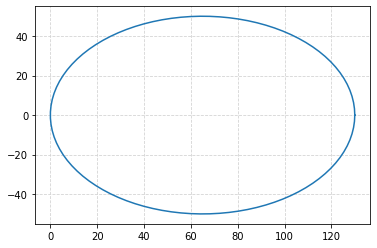

In [14]:
import numpy as np
from matplotlib import pyplot as plt
from math import pi

u=1.     #x-position of the center
v=0.5    #y-position of the center
a=2.     #radius on the x-axis
b=1.5    #radius on the y-axis

t = np.linspace(0, 2*pi, 100)
plt.plot(focusx+65*np.cos(t) , 50*np.sin(t) )
plt.grid(color='lightgray',linestyle='--')
plt.show()